# Ensamble Learning com RandomForest

Métodos que agrupam vários algortimos de ML para obter o melhor desempenho.

In [40]:
# Importação das bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Plot
from yellowbrick.classifier import ConfusionMatrix

In [2]:
credit = pd.read_csv('./dados/Credit.csv')
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [27]:
previsores = credit.iloc[:,:20]
classe = credit.iloc[:,20].values

In [28]:
# Pegando atributos categóricos.
cat = (credit.dtypes == 'object')
object_cols = list(cat[cat].index)
del object_cols[-1]
object_cols

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [29]:
labelencoder = LabelEncoder()
for i in object_cols:
    previsores[i] = labelencoder.fit_transform(previsores[i])

In [30]:
previsores = previsores.values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(previsores,
                                                    classe,
                                                    test_size=0.3,
                                                     random_state=0)

In [33]:
florest = RandomForestClassifier(n_estimators=1000)
florest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [35]:
florest.estimators_[:5]

[DecisionTreeClassifier(max_features='auto', random_state=2023154518),
 DecisionTreeClassifier(max_features='auto', random_state=443321769),
 DecisionTreeClassifier(max_features='auto', random_state=1588612735),
 DecisionTreeClassifier(max_features='auto', random_state=1260016042),
 DecisionTreeClassifier(max_features='auto', random_state=1541580748)]

In [43]:
prev = florest.predict(X_test)
confusion = confusion_matrix(y_test ,prev)
taxa = accuracy_score(y_test, prev)

In [44]:
confusion
florest.predict_proba(X_test)

array([[0.588, 0.412],
       [0.16 , 0.84 ],
       [0.07 , 0.93 ],
       [0.228, 0.772],
       [0.341, 0.659],
       [0.253, 0.747],
       [0.468, 0.532],
       [0.091, 0.909],
       [0.2  , 0.8  ],
       [0.557, 0.443],
       [0.625, 0.375],
       [0.495, 0.505],
       [0.293, 0.707],
       [0.372, 0.628],
       [0.557, 0.443],
       [0.341, 0.659],
       [0.37 , 0.63 ],
       [0.324, 0.676],
       [0.568, 0.432],
       [0.307, 0.693],
       [0.334, 0.666],
       [0.504, 0.496],
       [0.386, 0.614],
       [0.231, 0.769],
       [0.106, 0.894],
       [0.715, 0.285],
       [0.112, 0.888],
       [0.287, 0.713],
       [0.083, 0.917],
       [0.661, 0.339],
       [0.244, 0.756],
       [0.354, 0.646],
       [0.361, 0.639],
       [0.414, 0.586],
       [0.229, 0.771],
       [0.612, 0.388],
       [0.166, 0.834],
       [0.137, 0.863],
       [0.378, 0.622],
       [0.186, 0.814],
       [0.217, 0.783],
       [0.465, 0.535],
       [0.234, 0.766],
       [0.1

In [37]:
taxa

0.78

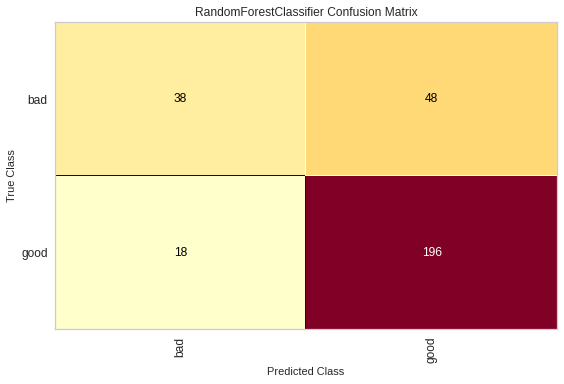

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [42]:
# Visualização da Matriz de confusão
v = ConfusionMatrix(florest)
v.fit(X_train, y_train)
v.score(X_test, y_test)
v.poof()